In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from synthetic_graphs import *
from solver import *

### Generate and test graphs

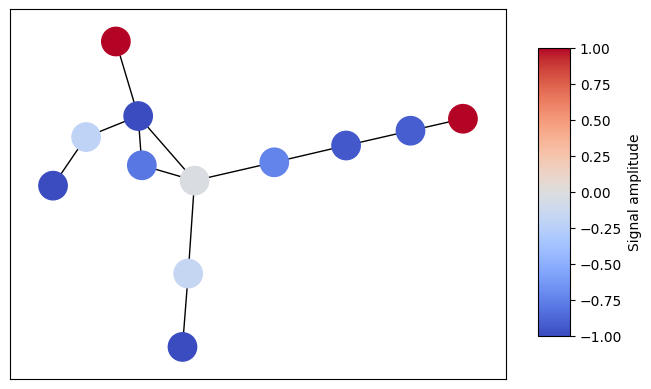

Mean and std:  (-0.39887664835077047, 0.7102848826043822)
Laplacian quadratic form:  11.714385321024698


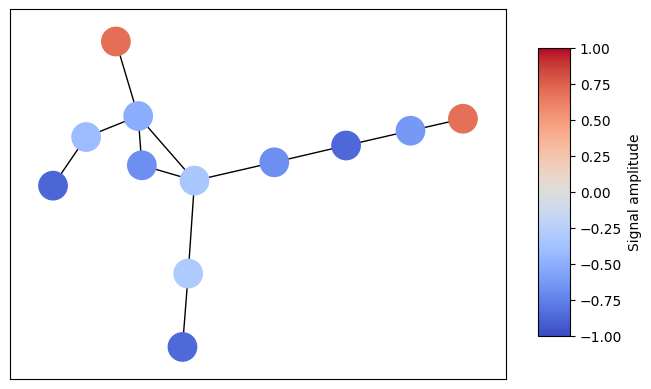

Mean and std:  (-0.3988766483507707, 0.5215750061672201)
Laplacian quadratic form:  4.11289891766689


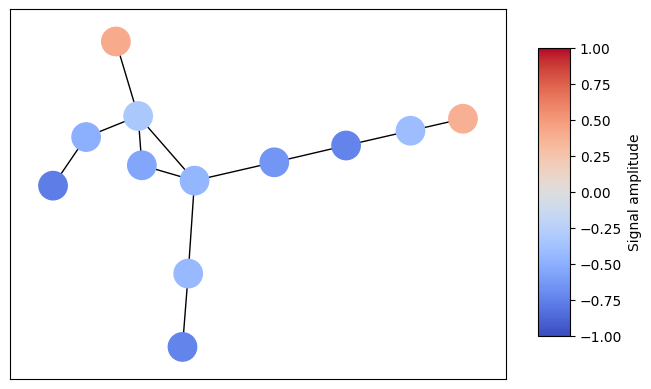

Mean and std:  (-0.3988766483507708, 0.3797879678175562)
Laplacian quadratic form:  1.5915742549839822


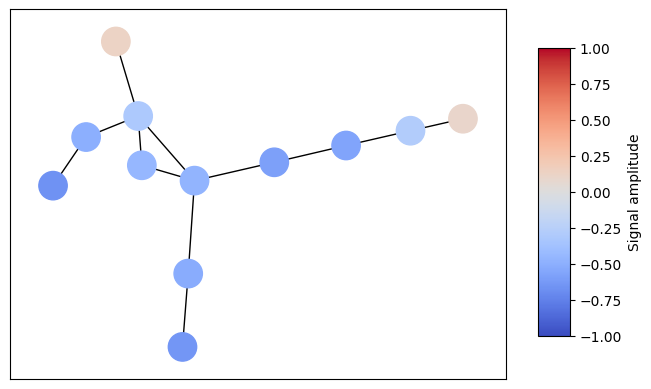

Mean and std:  (-0.39887664835077086, 0.25367958119380923)
Laplacian quadratic form:  0.5597392282901775


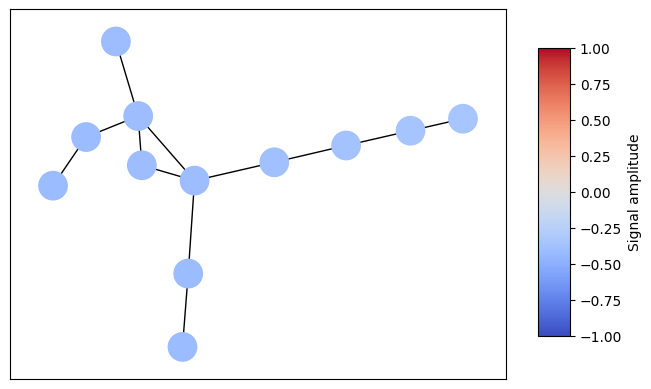

Mean and std:  (-0.39887664835077197, 0.02381226927610158)
Laplacian quadratic form:  0.0010153506290177963


In [14]:
# Input parameters
num_nodes = 12
num_edges = 12
value_range = (-1, 1)
diffusion_timesteps = [0, 2, 5, 10, 100]

# Create the graph
G0 = create_graph(num_nodes, num_edges, value_range, edge_weight_range = [1,1])

# Perform diffusion and plot the graph at each timestep
G_list = [G0]
for t in diffusion_timesteps:
    G = diffusion(G0,  diffusion_steps = t)
    G_list.append(G)
    plot_graph(G, labels=False, value_range=value_range)
    print("Mean and std: ", graph_stats(G))
    print("Laplacian quadratic form: ", signal_smoothness_on_graph(G))


In [15]:
#Sample the signal from the graph
samples = sample_signal_from_graph(G0, num_samples = 20, sampling_noise_std = 0.2)
print("Samples shape: ", samples.shape)
print("Samples: ", samples)

Samples shape:  (20, 12)
Samples:  [[-0.8627701  -0.8794878   0.71419419 -0.41456127 -0.02168357 -0.69416347
  -1.01822494 -1.22328113 -1.15969596  0.9352746   0.18119869 -1.17049501]
 [-0.50808526 -0.57206322  0.90312976 -0.13706453  0.08062212 -0.88162989
  -1.06259445 -0.76480314 -1.07012755  0.8456972  -0.18329389 -0.47231871]
 [-1.02199217 -0.51964688  1.17238456  0.00793117 -0.46468354 -0.97113093
  -0.61529952 -1.03406914 -0.90635698  0.82869659 -0.2486483  -0.82809098]
 [-1.45269382 -0.98781222  1.03944899  0.21055504 -0.1464653  -0.89835524
  -0.98228022 -0.52491798 -0.98855073  0.6964191  -0.00809787 -0.82834268]
 [-0.89969558 -0.9682303   0.83766781 -0.03620225 -0.74561236 -0.92142549
  -1.05402273 -1.05908491 -0.93488993  0.99166918 -0.1679739  -0.3027215 ]
 [-0.82430236 -0.88723632  1.41145377  0.05324897  0.03078205 -0.987184
  -0.66301935 -1.12650734 -0.91079391  0.51640562 -0.1392133  -0.8281095 ]
 [-1.04525824 -1.04786046  1.31533857 -0.09009025 -0.08514865 -1.21157745

### Test of the initial solver

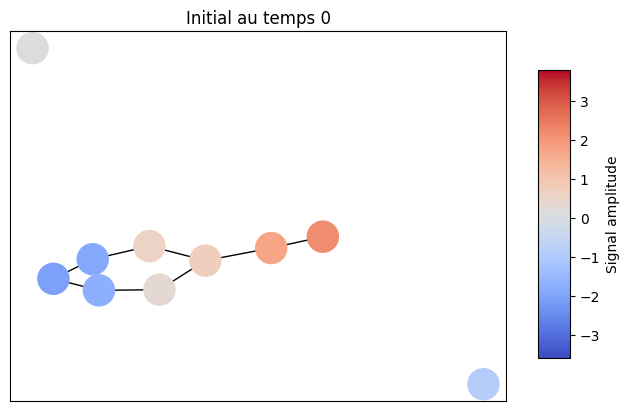

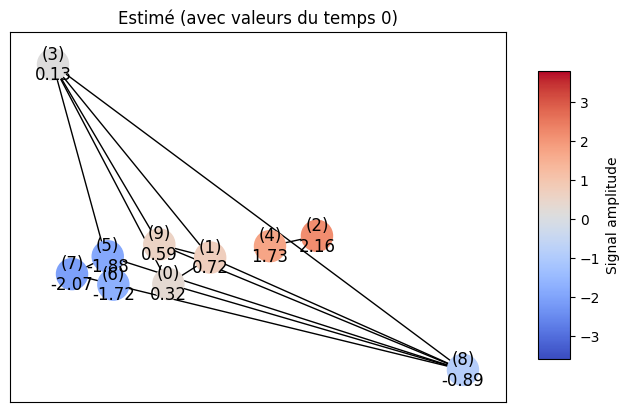

In [46]:

solvers.options['show_progress'] = False
syn = synthetic_data_gen(10)
num_nodes = syn.num_vertices

np.random.seed(3)
graph_signals_er, graph_signals_ba, graph_signals_rand = syn.get_graph_signals()
L_er, Y_er = gl_sig_model(graph_signals_er, 1000, syn.alpha_er, syn.beta_er)
L_ba, Y_ba = gl_sig_model(graph_signals_ba, 1000, syn.alpha_er, syn.beta_er)
L_rnd, Y_rnd = gl_sig_model(graph_signals_rand, 1000, syn.alpha_rnd, syn.beta_rnd)

L_er_gt = nx.laplacian_matrix(syn.er_graph)
L_ba_gt = nx.laplacian_matrix(syn.ba_graph)
L_rnd_gt = nx.laplacian_matrix(syn.random_graph)

gt_graph = syn.er_graph
est_graph = create_graph_from_laplacian(L_er)
pos = nx.spring_layout(gt_graph)
for node in gt_graph.nodes():
    gt_graph.nodes[node]['pos'] = list(pos[node])
    gt_graph.nodes[node]['value'] = graph_signals_er[0][node]
for edge in gt_graph.edges():
    gt_graph[edge[0]][edge[1]]['weight'] = 1
for node in est_graph.nodes():
    est_graph.nodes[node]['pos'] = list(pos[node])
    est_graph.nodes[node]['value'] = graph_signals_er[0][node]
for edge in est_graph.edges():
    est_graph[edge[0]][edge[1]]['weight'] = 1

# subax1 = plt.subplot(121)
# nx.draw(syn.er_graph, with_labels=True, font_weight='bold')
# subax2 = plt.subplot(122)
# nx.draw(est_graph, with_labels=True, font_weight='bold')
plot_graph(gt_graph, [np.min(graph_signals_er), np.max(graph_signals_er)], labels=False, title="Initial au temps 0")
plot_graph(est_graph, [np.min(graph_signals_er), np.max(graph_signals_er)], labels=False, title="Estimé (avec valeurs du temps 0)")

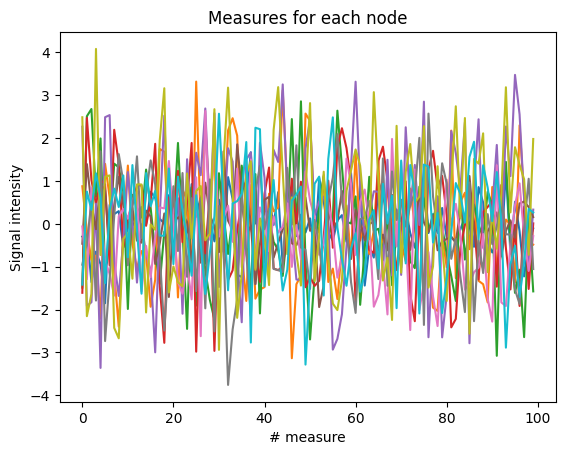

In [29]:
# Plot the 100 measures on each node
plt.figure()
for node in range(graph_signals_er.shape[1]) :
    plt.plot(graph_signals_er[:, node], label = f"Signal du noeud {node}")
# plt.legend()
plt.title("Measures for each node")
plt.xlabel("# measure")
plt.ylabel("Signal intensity")
plt.show()